In [1]:
from sift import detect, visualize_keypoints, draw_match_lines, concat, ransac, listwise_match, ikp_qkp, draw_transfrom_points
from torchvision.transforms.functional import to_pil_image, pil_to_tensor
import torchvision.transforms as T
from PIL import Image

In [2]:
resize = T.Resize(256)
transforms = T.Compose([T.Resize(256), T.RandomRotation(30), T.RandomAffine(0, translate=(0.2, 0.2)), T.RandomPerspective(distortion_scale=0.5), T.PILToTensor()])

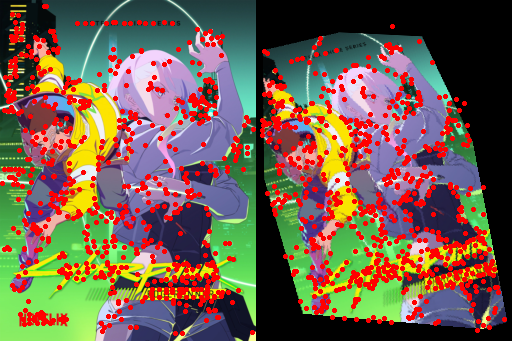

In [3]:
example_image_path = 'example.jpg'
image = Image.open(example_image_path).convert('RGB')

index_image = resize(image)
index_image = pil_to_tensor(index_image)
query_image = transforms(image)

idx_kps, idx_descs = detect(index_image)
index_kps_image = visualize_keypoints(index_image, idx_kps.unsqueeze(0))

query_kps, query_descs = detect(query_image)
query_kps_image = visualize_keypoints(query_image, query_kps.unsqueeze(0))

side_by_side = concat(index_kps_image, query_kps_image, dim=1)
side_by_side

In [4]:
idx_idesc_qdesc = listwise_match(idx_descs.unsqueeze(0), query_descs.unsqueeze(0))
idx_ikp, idx_qkp = ikp_qkp(idx_kps.unsqueeze(0), query_kps.unsqueeze(0), idx_idesc_qdesc)
lines_without_ransac = draw_match_lines(index_image, query_image, idx_ikp.squeeze(0), idx_qkp.squeeze(0))

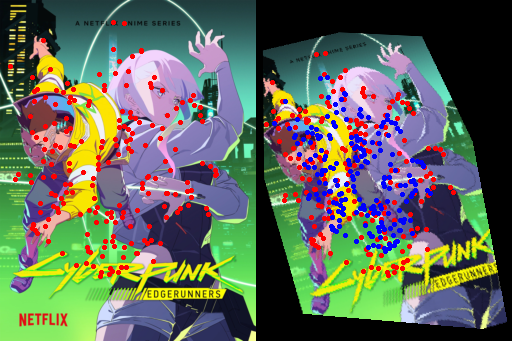

In [5]:
H, selected_X, selected_Y = ransac(idx_ikp, idx_qkp)
ransac_index_kps_image = visualize_keypoints(index_image, selected_X.unsqueeze(0))
ransac_query_kps_image = visualize_keypoints(query_image, selected_Y.unsqueeze(0))

ransac_kps_side_by_side = draw_transfrom_points(index_image, query_image, H, selected_X, selected_Y)
ransac_kps_side_by_side

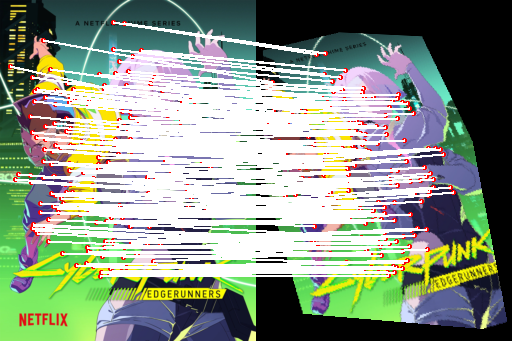

In [6]:
ransac_lines_side_by_size = draw_match_lines(index_image, query_image, selected_X, selected_Y)
ransac_lines_side_by_size

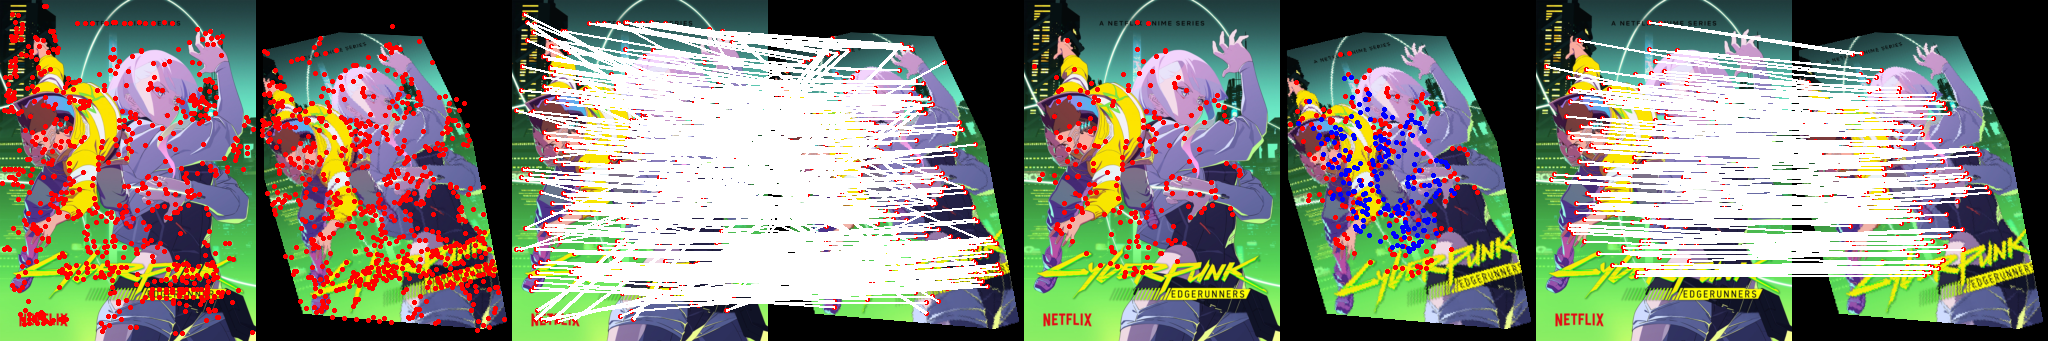

In [7]:
outcome = concat(side_by_side, lines_without_ransac)
outcome = concat(outcome, ransac_kps_side_by_side)
outcome = concat(outcome, ransac_lines_side_by_size)
outcome